# Load data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings
import gdown
warnings.filterwarnings('ignore')

In [3]:
# C1: tự động tải và load data
file_id = '1GU-ty9O5bmLGvXfvJj6SuQ-UyHb9RTh9'
url = f'https://drive.google.com/uc?id={file_id}'
output = 'data.csv'

gdown.download(url, output, quiet=False)
df = pd.read_csv('data.csv')
df

Downloading...
From: https://drive.google.com/uc?id=1GU-ty9O5bmLGvXfvJj6SuQ-UyHb9RTh9
To: c:\Users\ADMIN\OneDrive\Machine Learning\machine_learning\final_term\data.csv
100%|██████████| 22.7M/22.7M [00:11<00:00, 2.06MB/s]


,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,0.0,1.0,1.0,1.0,18.0,0.0,0.0,2.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [ ]:
# C2: tải file data về thư mục và load data

df = pd.read_csv("heart_disease_health_indicators_BRFSS2015.csv")
df 

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

X = df.drop('HeartDiseaseorAttack', axis=1)
y = df['HeartDiseaseorAttack'].astype(int)

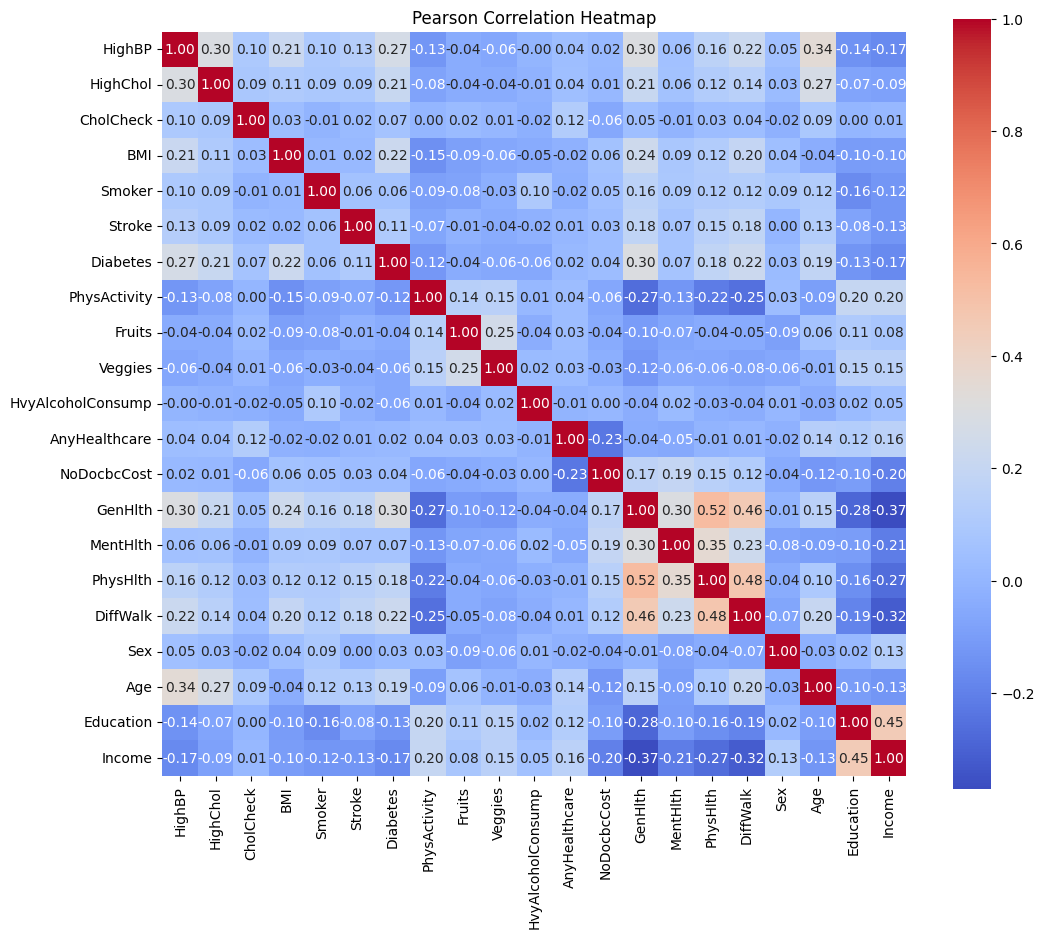

In [3]:
# pearson correlation
correlation = X.corr(method='pearson')
plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Pearson Correlation Heatmap')
plt.show()

# GMM

## Chọn số cụm phù hợp

In [21]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.metrics import (
    silhouette_score, davies_bouldin_score, calinski_harabasz_score,
    adjusted_rand_score, fowlkes_mallows_score, normalized_mutual_info_score
)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_normalized = StandardScaler().fit_transform(X)

X_sample, _, y_sample, _ = train_test_split(
    X_normalized, y, test_size=0.9, stratify=y, random_state=42
)

range_n = range(2, 11) 

sil_scores = []
dbi_scores = []
ch_scores = []
ari_scores = []
fmi_scores = []
nmi_scores = []

for n in range_n:
    gmm = GaussianMixture(n_components=n, random_state=42)
    labels = gmm.fit_predict(X_sample)

    sil_scores.append(silhouette_score(X_sample, labels))
    dbi_scores.append(davies_bouldin_score(X_sample, labels))
    ch_scores.append(calinski_harabasz_score(X_sample, labels))

    ari_scores.append(adjusted_rand_score(y_sample, labels))
    fmi_scores.append(fowlkes_mallows_score(y_sample, labels))
    nmi_scores.append(normalized_mutual_info_score(y_sample, labels))

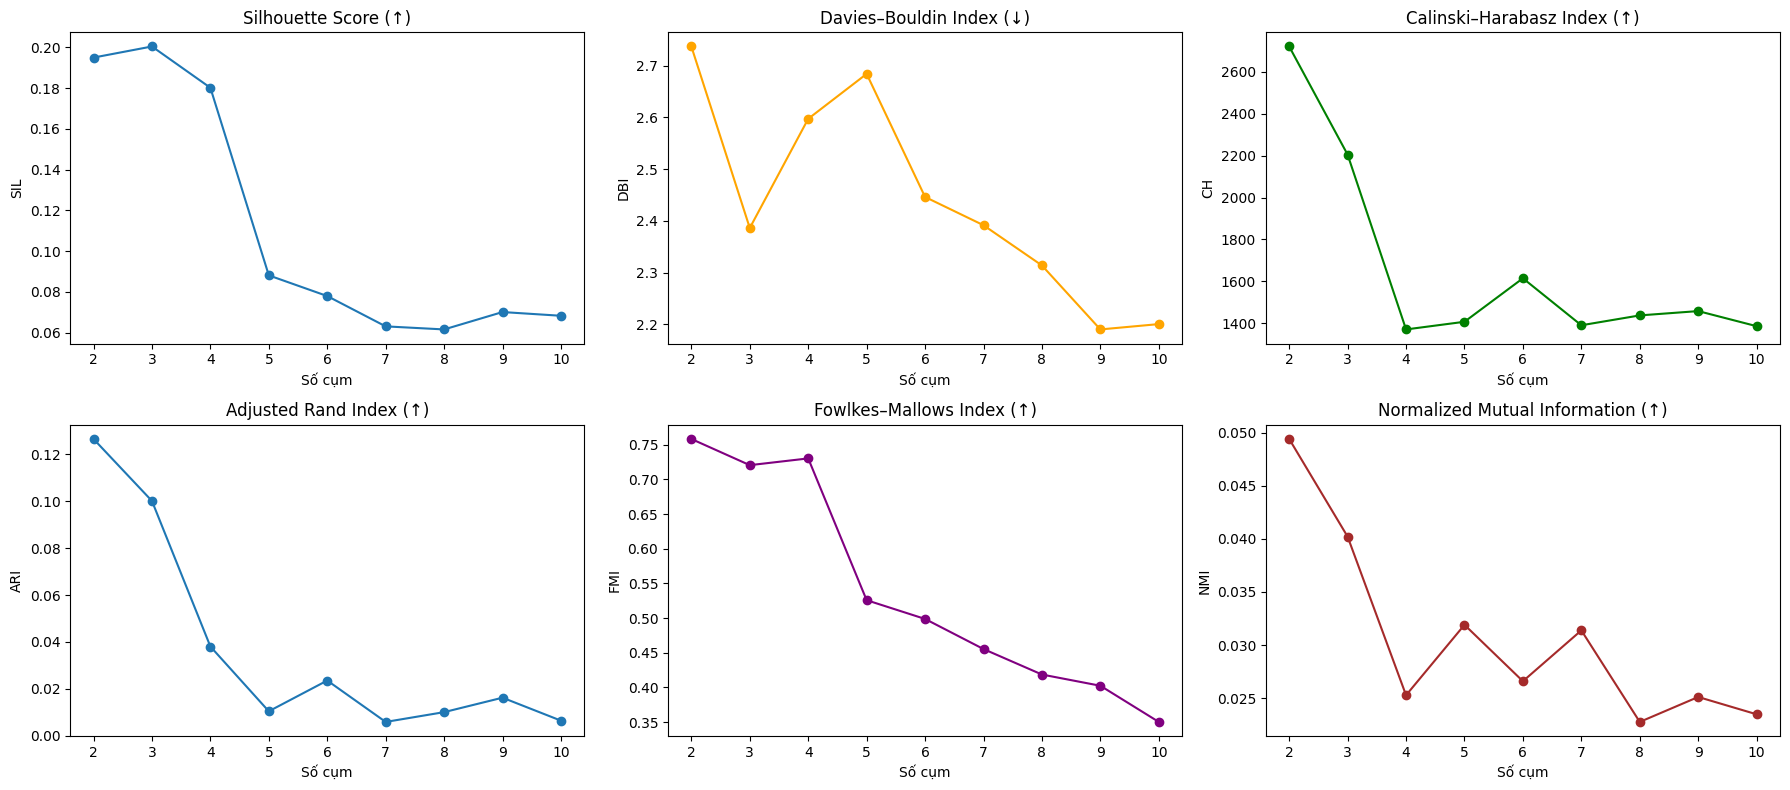

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(18, 8))

axs[0, 0].plot(range_n, sil_scores, marker='o')
axs[0, 0].set_title("Silhouette Score (↑)")
axs[0, 0].set_xlabel("Số cụm")
axs[0, 0].set_ylabel("SIL")

axs[0, 1].plot(range_n, dbi_scores, marker='o', color='orange')
axs[0, 1].set_title("Davies–Bouldin Index (↓)")
axs[0, 1].set_xlabel("Số cụm")
axs[0, 1].set_ylabel("DBI")

axs[0, 2].plot(range_n, ch_scores, marker='o', color='green')
axs[0, 2].set_title("Calinski–Harabasz Index (↑)")
axs[0, 2].set_xlabel("Số cụm")
axs[0, 2].set_ylabel("CH")

axs[1, 0].plot(range_n, ari_scores, marker='o')
axs[1, 0].set_title("Adjusted Rand Index (↑)")
axs[1, 0].set_xlabel("Số cụm")
axs[1, 0].set_ylabel("ARI")

axs[1, 1].plot(range_n, fmi_scores, marker='o', color='purple')
axs[1, 1].set_title("Fowlkes–Mallows Index (↑)")
axs[1, 1].set_xlabel("Số cụm")
axs[1, 1].set_ylabel("FMI")

axs[1, 2].plot(range_n, nmi_scores, marker='o', color='brown')
axs[1, 2].set_title("Normalized Mutual Information (↑)")
axs[1, 2].set_xlabel("Số cụm")
axs[1, 2].set_ylabel("NMI")

plt.tight_layout()
plt.show()

Hầu hết các thang đo đều cho thấy số cụm tối ưu nhất có thể là 2, SIL có giá trị nhỉnh hơn một chút với số cụm 3 và DBI cho số cụm tối ưu là 9.

## GMM with sample data

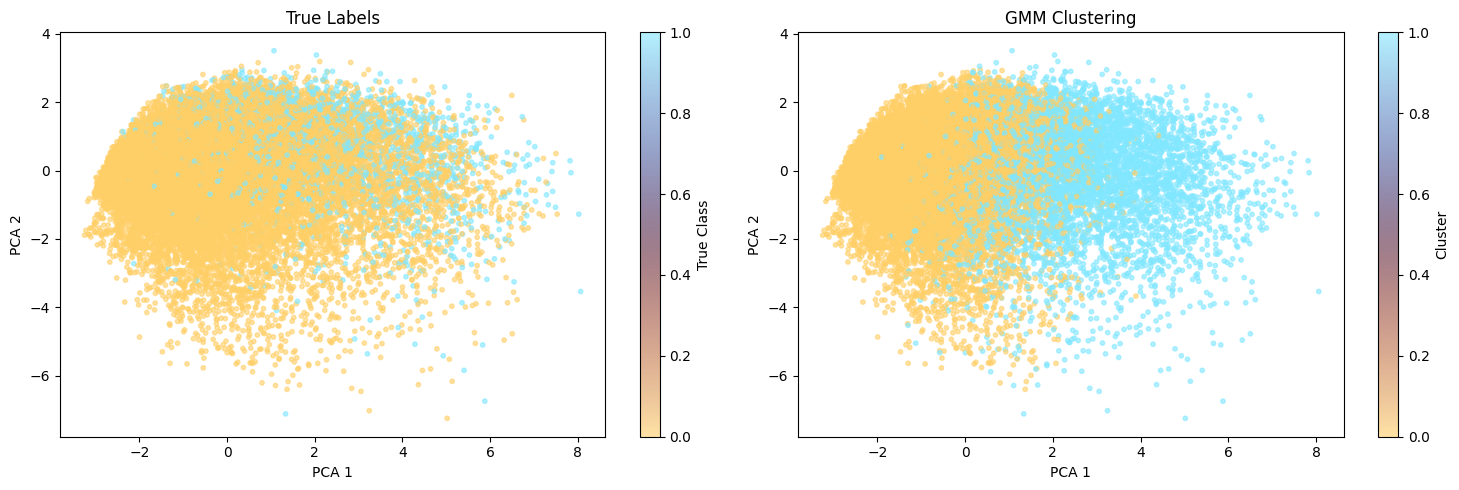

In [61]:
# GMM with sample data
gmm = GaussianMixture(n_components=2, random_state=42)
gmm.fit(X_sample)
labels = gmm.predict(X_sample)

# exchang 0 and 1 labels
labels = np.where(labels == 0, 1, 0)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_sample)

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_sample, cmap='managua', s=10, alpha=0.6)
plt.title("True Labels")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label='True Class')

plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='managua', s=10, alpha=0.6)
plt.title("GMM Clustering")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label='Cluster')

plt.tight_layout()
plt.show()


In [57]:
np.sum(labels == 1), np.sum(labels == 0), np.sum(y_sample == 1), np.sum(y_sample == 0)

(6256, 19112, 2389, 22979)

In [58]:
print("Silhouette Score:", silhouette_score(X_sample, labels))
print("Davies–Bouldin Index:", davies_bouldin_score(X_sample, labels))
print("Calinski–Harabasz Index:", calinski_harabasz_score(X_sample, labels))
print("Adjusted Rand Index:", adjusted_rand_score(y_sample, labels))
print("Fowlkes–Mallows Index:", fowlkes_mallows_score(y_sample, labels))
print("Normalized Mutual Information:", normalized_mutual_info_score(y_sample, labels))

Silhouette Score: 0.1950117827707468
Davies–Bouldin Index: 2.7369539625879353
Calinski–Harabasz Index: 2721.104198907507
Adjusted Rand Index: 0.12649517853237038
Fowlkes–Mallows Index: 0.7583242404976669
Normalized Mutual Information: 0.04940623385789144


In [68]:
# 3D visualization by plotly
import plotly.express as px
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
X_pca_3d = pca.fit_transform(X_sample)

fig = px.scatter_3d(
    x=X_pca_3d[:, 0], y=X_pca_3d[:, 1], z=X_pca_3d[:, 2],
    color=y_sample, labels={'color': 'Cluster'},
    title='3D PCA Visualization of True Labels'
)
fig.update_traces(marker=dict(size=1))
fig.show()

In [67]:
# 3D visualization by plotly
import plotly.express as px
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
X_pca_3d = pca.fit_transform(X_sample)

fig = px.scatter_3d(
    x=X_pca_3d[:, 0], y=X_pca_3d[:, 1], z=X_pca_3d[:, 2],
    color=labels, labels={'color': 'Cluster'},
    title='3D PCA Visualization of GMM Clustering'
)
fig.update_traces(marker=dict(size=1))
fig.show()

## GMM with original data

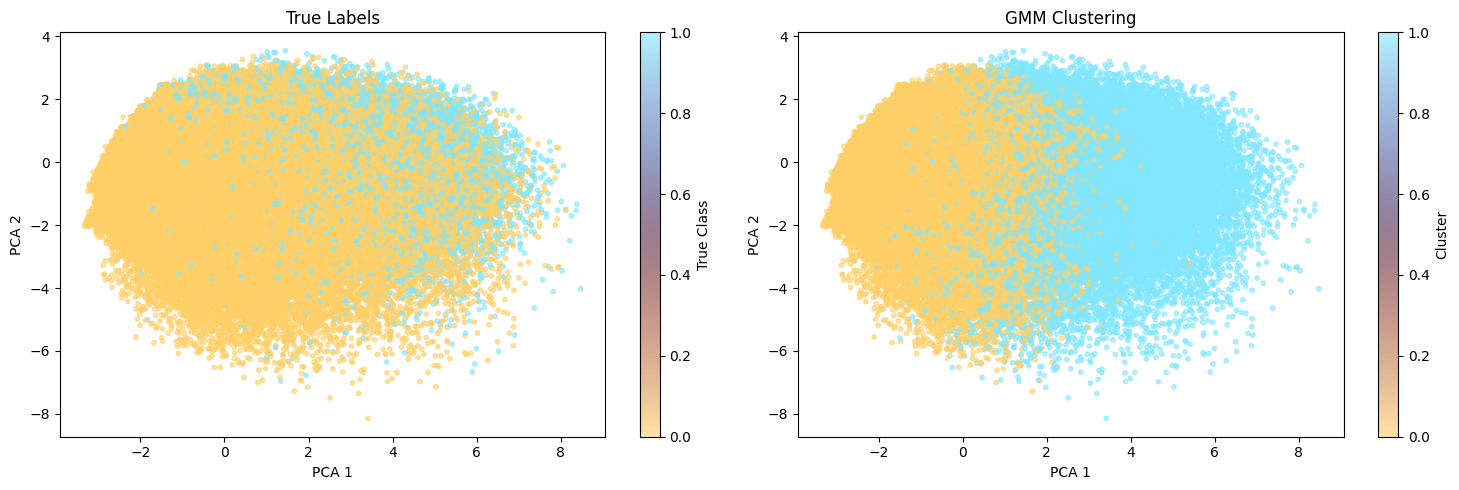

In [84]:
# GMM with sample data
gmm = GaussianMixture(n_components=2, random_state=42)
gmm.fit(X_normalized)
labels = gmm.predict(X_normalized)
labels = np.where(labels == 0, 1, 0) 

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_normalized)

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='managua', s=10, alpha=0.6)
plt.title("True Labels")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label='True Class')

plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='managua', s=10, alpha=0.6)
plt.title("GMM Clustering")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label='Cluster')

plt.tight_layout()
plt.show()

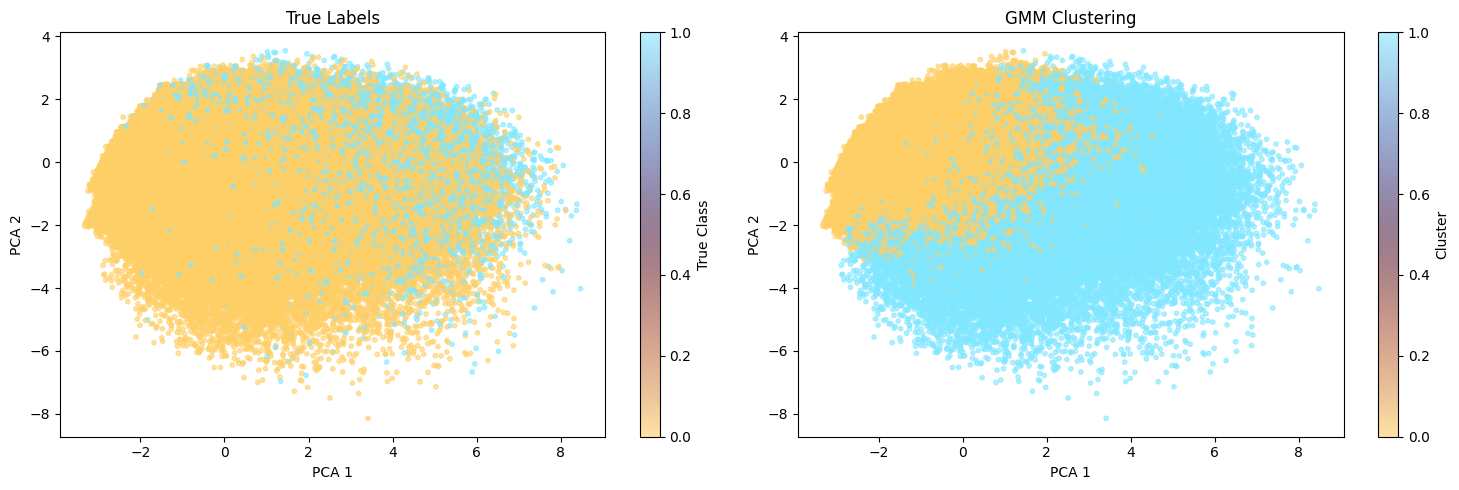

In [85]:
# try selecting some relevant features
selected_features = [
    'PhysActivity', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
    'MentHlth', 'PhysHlth', 'DiffWalk', 'Education', 'Income'
]

X_selected = X[selected_features]
y_selected = df['HeartDiseaseorAttack'].astype(int)
X_selected_normalized = StandardScaler().fit_transform(X_selected)
# GMM with selected features
gmm_selected = GaussianMixture(n_components=2, random_state=42)
gmm_selected.fit(X_selected_normalized)
labels_selected = gmm_selected.predict(X_selected_normalized)
labels_selected = np.where(labels_selected == 0, 1, 0) 
pca_selected = PCA(n_components=2)

X_pca = pca_selected.fit_transform(X_normalized)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_selected, cmap='managua', s=10, alpha=0.6)
plt.title("True Labels")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label='True Class')
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_selected, cmap='managua', s=10, alpha=0.6)
plt.title("GMM Clustering")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label='Cluster')
plt.tight_layout()
plt.show()

# XGBoost

## train : test = 4 : 1

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### XGBoost

In [9]:
# XGBoost
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred))

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     45968
           1       0.52      0.12      0.19      4768

    accuracy                           0.91     50736
   macro avg       0.72      0.55      0.57     50736
weighted avg       0.88      0.91      0.88     50736



In [ ]:
# defautl hyperparameters of XGBoost

xgb.get_booster().save_config()

import json

json_str = xgb.get_booster().save_config()

config = json.loads(json_str)

tree_params = config['learner']['gradient_booster']['tree_train_param']
learner_params = config['learner']['learner_train_param']
objective_params = config['learner']['objective']
generic_params = config['learner']['generic_param']

print("learning_rate (eta):", tree_params.get('eta'))
print("max_depth:", tree_params.get('max_depth'))
print("gamma:", tree_params.get('gamma'))
print("subsample:", tree_params.get('subsample'))
print("colsample_bytree:", tree_params.get('colsample_bytree'))
print("reg_alpha:", tree_params.get('reg_alpha'))
print("reg_lambda:", tree_params.get('reg_lambda'))
print("scale_pos_weight:", objective_params['reg_loss_param'].get('scale_pos_weight'))
print("objective:", objective_params.get('name'))
print("booster:", learner_params.get('booster'))
print("num_trees (n_estimators):", config['learner']['gradient_booster']['gbtree_model_param'].get('num_trees'))
print("device:", generic_params.get('device'))
print("random_state (seed):", generic_params.get('seed'))


learning_rate (eta): 0.300000012
max_depth: 6
gamma: 0
subsample: 1
colsample_bytree: 1
reg_alpha: 0
reg_lambda: 1
scale_pos_weight: 1
objective: binary:logistic
booster: gbtree
num_trees (n_estimators): 100
device: cpu
random_state (seed): 0


In [7]:
# performance on training set
y_train_pred = xgb.predict(X_train)
print("XGBoost Training Set Classification Report:")
print(classification_report(y_train, y_train_pred))

XGBoost Training Set Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95    183819
           1       0.69      0.16      0.26     19125

    accuracy                           0.91    202944
   macro avg       0.81      0.57      0.61    202944
weighted avg       0.90      0.91      0.89    202944



### XGBoost with imbalance handling

In [34]:
n_0 = y_train.value_counts()[0]
n_1 = y_train.value_counts()[1]
scale_pos_weight = n_0 / n_1
xgb_imbalance = XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=scale_pos_weight)
xgb_imbalance.fit(X_train, y_train)
y_pred_imbalance = xgb_imbalance.predict(X_test)
print("XGBoost with Imbalance Handling Classification Report:")
print(classification_report(y_test, y_pred_imbalance))

# performance on training set
y_train_pred = xgb_imbalance.predict(X_train)
print("XGBoost Training Set Classification Report:")
print(classification_report(y_train, y_train_pred))

XGBoost with Imbalance Handling Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.75      0.85     45968
           1       0.25      0.78      0.37      4768

    accuracy                           0.75     50736
   macro avg       0.61      0.77      0.61     50736
weighted avg       0.90      0.75      0.80     50736

XGBoost Training Set Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.76      0.85    183819
           1       0.27      0.85      0.41     19125

    accuracy                           0.76    202944
   macro avg       0.62      0.80      0.63    202944
weighted avg       0.91      0.76      0.81    202944



Có thể thấy việc thay đổi tham số scale_pos_weight đã cải thiện đáng kể khả năng dự báo nhãn 1 của mô hình.

In [ ]:
# try to set hyperparameters
xgb = XGBClassifier(
    eval_metric='logloss',
    n_estimators=300,           
    learning_rate=0.05,         
    max_depth=5,                
    subsample=0.8,              
    colsample_bytree=0.8,       
    gamma=1,                    
    reg_alpha=0.1,              
    reg_lambda=1,               
    scale_pos_weight=scale_pos_weight
)

xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)
print("Test Classification Report:")
print(classification_report(y_test, y_pred))

y_train_pred = xgb.predict(X_train)
print("Train Classification Report:")
print(classification_report(y_train, y_train_pred))

Test Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.74      0.84     45968
           1       0.24      0.81      0.38      4768

    accuracy                           0.74     50736
   macro avg       0.61      0.78      0.61     50736
weighted avg       0.91      0.74      0.80     50736

Train Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.74      0.84    183819
           1       0.25      0.83      0.38     19125

    accuracy                           0.75    202944
   macro avg       0.61      0.78      0.61    202944
weighted avg       0.91      0.75      0.80    202944



Việc thay đổi các siêu tham số khác cũng có thể cải thiện các chỉ số đánh giá. Ta thử tiến hành tìm bộ siêu tham số tối ưu cho mô hình theo từng tiêu chí F1, Recall, Precision bằng RandomizedSearchCV

In [29]:
scale_pos_weight

9.611450980392156

In [38]:
# F1 score
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, f1_score

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

param_dist = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 1, 5],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [1, 5, 10],
    'scale_pos_weight': [1, 2, 4, 8, scale_pos_weight],
    'random_state': [42]
}

f1_scorer = make_scorer(f1_score)

random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=50,
    scoring=f1_scorer,
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

print("Best params:", random_search.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best params: {'subsample': 0.6, 'scale_pos_weight': 4, 'reg_lambda': 1, 'reg_alpha': 0.1, 'random_state': 42, 'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.05, 'gamma': 1, 'colsample_bytree': 0.6}


In [30]:
params =  {
    'subsample': 0.6, 
    'scale_pos_weight': 4, 
    'reg_lambda': 1, 
    'reg_alpha': 0.1, 
    'random_state': 42, 
    'n_estimators': 300, 
    'max_depth': 3, 
    'learning_rate': 0.05, 
    'gamma': 1, 
    'colsample_bytree': 0.6
    }

xgb_best = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    **params
)
xgb_best.fit(X_train, y_train)
y_pred_best = xgb_best.predict(X_test)
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_best))

y_train_pred_best = xgb_best.predict(X_train)
print("XGBoost Training Set Classification Report:")
print(classification_report(y_train, y_train_pred_best))

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.88      0.92     45968
           1       0.33      0.57      0.42      4768

    accuracy                           0.85     50736
   macro avg       0.64      0.72      0.67     50736
weighted avg       0.89      0.85      0.87     50736

XGBoost Training Set Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.88      0.92    183819
           1       0.34      0.57      0.42     19125

    accuracy                           0.85    202944
   macro avg       0.64      0.73      0.67    202944
weighted avg       0.89      0.85      0.87    202944



In [ ]:
# Recall score
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, recall_score

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

param_dist = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 1, 5],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [1, 5, 10],
    'scale_pos_weight': [1, 2, 4, 8, scale_pos_weight],
    'random_state': [42]
}

f1_scorer = make_scorer(recall_score)

random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=50,
    scoring=f1_scorer,
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

print("Best params:", random_search.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best params: {'subsample': 1.0, 'scale_pos_weight': 9.611450980392156, 'reg_lambda': 1, 'reg_alpha': 0.1, 'random_state': 42, 'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.01, 'gamma': 1, 'colsample_bytree': 0.8}
Best F1 score: 0.8244183006535948


In [ ]:
params =  {'subsample': 1.0, 
           'scale_pos_weight': 9.611450980392156, 
           'reg_lambda': 1, 
           'reg_alpha': 0.1, 
           'random_state': 42, 
           'n_estimators': 300, 
           'max_depth': 3, 
           'learning_rate': 0.01, 
           'gamma': 1, 
           'colsample_bytree': 0.8
           }

xgb_best = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    **params
)
xgb_best.fit(X_train, y_train)
y_pred_best = xgb_best.predict(X_test)
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_best))

y_train_pred_best = xgb_best.predict(X_train)
print("XGBoost Training Set Classification Report:")
print(classification_report(y_train, y_train_pred_best))

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.72      0.83     45968
           1       0.23      0.83      0.36      4768

    accuracy                           0.73     50736
   macro avg       0.60      0.77      0.60     50736
weighted avg       0.91      0.73      0.78     50736

Accuracy: 0.72839798170924
F1 Score: 0.36403913605316596
Recall Score: 0.8271812080536913
Precision Score: 0.23337278106508877
XGBoost Training Set Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.71      0.82    183819
           1       0.23      0.83      0.36     19125

    accuracy                           0.72    202944
   macro avg       0.60      0.77      0.59    202944
weighted avg       0.91      0.72      0.78    202944



In [ ]:
# Precision score
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, precision_score

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

param_dist = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 1, 5],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [1, 5, 10],
    'scale_pos_weight': [1, 2, 4, 8, scale_pos_weight],
    'random_state': [42]
}

f1_scorer = make_scorer(precision_score)

random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=50,
    scoring=f1_scorer,
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

print("Best params:", random_search.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best params: {'subsample': 1.0, 'scale_pos_weight': 2, 'reg_lambda': 1, 'reg_alpha': 0.1, 'random_state': 42, 'n_estimators': 100, 'max_depth': 7, 'learning_rate': 0.01, 'gamma': 0, 'colsample_bytree': 0.6}
Best Precision: 0.6777705372021893


In [ ]:
params =  {'subsample': 1.0, 
           'scale_pos_weight': 2, 
           'reg_lambda': 1, 
           'reg_alpha': 0.1, 
           'random_state': 42, 
           'n_estimators': 100, 
           'max_depth': 7, 
           'learning_rate': 0.01, 
           'gamma': 0, 
           'colsample_bytree': 0.6
           }

xgb_best = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    **params
)
xgb_best.fit(X_train, y_train)
y_pred_best = xgb_best.predict(X_test)
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_best))

y_train_pred_best = xgb_best.predict(X_train)
print("XGBoost Training Set Classification Report:")
print(classification_report(y_train, y_train_pred_best))

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     45968
           1       0.73      0.04      0.07      4768

    accuracy                           0.91     50736
   macro avg       0.82      0.52      0.51     50736
weighted avg       0.89      0.91      0.87     50736

XGBoost Training Set Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95    183819
           1       0.72      0.04      0.07     19125

    accuracy                           0.91    202944
   macro avg       0.82      0.52      0.51    202944
weighted avg       0.89      0.91      0.87    202944



Trong bài toán này, ta sẽ ưu tiên việc bắt được càng nhiều ca bệnh càng tốt => Lựa chọn theo Recall

#### dimensionality reduction

In [40]:
# Recall score
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, recall_score

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

param_dist = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 1, 5],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [1, 5, 10],
    'scale_pos_weight': [1, 2, 4, 8, scale_pos_weight],
    'random_state': [42]
}

recall_scorer = make_scorer(recall_score)

random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=50,
    scoring=recall_scorer,
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
pca = PCA(n_components=6) 
X_pca = pca.fit_transform(X_scaled)

random_search.fit(X_pca, y_train)

print("Best params:", random_search.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best params: {'subsample': 1.0, 'scale_pos_weight': 9.611450980392156, 'reg_lambda': 1, 'reg_alpha': 0.1, 'random_state': 42, 'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.01, 'gamma': 1, 'colsample_bytree': 0.8}


In [ ]:
params =  {'subsample': 1.0, 
           'scale_pos_weight': 9.611450980392156,
           'reg_lambda': 1, 'reg_alpha': 0.1, 
           'random_state': 42, 
           'n_estimators': 300, 
           'max_depth': 3, 
           'learning_rate': 0.01, 
           'gamma': 1, 
           'colsample_bytree': 0.8
           }

# try on dimensionality reduction
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
pca = PCA(n_components=6) 
X_pca = pca.fit_transform(X_scaled)
xgb_pca = XGBClassifier(use_label_encoder=False, eval_metric='logloss', **params)
xgb_pca.fit(X_pca, y_train)

y_pred_pca = xgb_pca.predict(pca.transform(scaler.transform(X_test)))
print("XGBoost with PCA Classification Report:")
print(classification_report(y_test, y_pred_pca))

# performance on training set
y_train_pred_pca = xgb_pca.predict(X_pca)
print("XGBoost with PCA Training Set Classification Report:")
print(classification_report(y_train, y_train_pred_pca))

XGBoost with PCA Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.69      0.80     45968
           1       0.21      0.82      0.34      4768

    accuracy                           0.70     50736
   macro avg       0.59      0.75      0.57     50736
weighted avg       0.90      0.70      0.76     50736

XGBoost with PCA Training Set Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.69      0.81    183819
           1       0.21      0.82      0.34     19125

    accuracy                           0.70    202944
   macro avg       0.59      0.75      0.57    202944
weighted avg       0.90      0.70      0.76    202944



Hiệu suất của mô hình trên dữ liệu giảm chiều không có sự cải thiện

### XGBoost + Oversampling

In [43]:
# Recall score
# xgboost + random oversampling
from imblearn.over_sampling import RandomOverSampler
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, recall_score

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

param_dist = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 1, 5],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [1, 5, 10],
    'random_state': [42]
}

recall_scorer = make_scorer(recall_score)

random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=50,
    scoring=recall_scorer,
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

random_search.fit(X_train_ros, y_train_ros)

print("Best params:", random_search.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best params: {'subsample': 0.6, 'reg_lambda': 5, 'reg_alpha': 0.1, 'random_state': 42, 'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.2, 'gamma': 1, 'colsample_bytree': 1.0}


In [ ]:
# xgboost + random oversampling
from imblearn.over_sampling import RandomOverSampler
from xgboost import XGBClassifier

params = {
    'subsample': 0.6, 
    'reg_lambda': 5, 
    'reg_alpha': 0.1, 
    'random_state': 42, 
    'n_estimators': 200, 
    'max_depth': 7, 
    'learning_rate': 0.2, 
    'gamma': 1, 
    'colsample_bytree': 1.0
    }
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)
xgb_ros = XGBClassifier(use_label_encoder=False, eval_metric='logloss', **params)
xgb_ros.fit(X_train_ros, y_train_ros)
y_pred_ros = xgb_ros.predict(X_test)

print("XGBoost with Random Oversampling Classification Report:")
print(classification_report(y_test, y_pred_ros))

# performance on training set
y_train_pred = xgb_ros.predict(X_train)
print("XGBoost with Random Oversampling Training Set Classification Report:")
print(classification_report(y_train, y_train_pred))

XGBoost with Random Oversampling Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.78      0.86     45968
           1       0.25      0.73      0.37      4768

    accuracy                           0.77     50736
   macro avg       0.61      0.75      0.62     50736
weighted avg       0.90      0.77      0.81     50736

XGBoost with Random Oversampling Training Set Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.79      0.88    183819
           1       0.30      0.88      0.45     19125

    accuracy                           0.80    202944
   macro avg       0.64      0.83      0.66    202944
weighted avg       0.92      0.80      0.84    202944



In [45]:
# Recall score
# xgboost + random oversampling on dimensionality reduced data
from imblearn.over_sampling import RandomOverSampler
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, recall_score

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

param_dist = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 1, 5],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [1, 5, 10],
    'random_state': [42]
}

recall_scorer = make_scorer(recall_score)

random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=50,
    scoring=recall_scorer,
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

std = StandardScaler()
X_train_scaled = std.fit_transform(X_train_ros)
X_test_scaled = std.transform(X_test)

pca = PCA(n_components=6)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


random_search.fit(X_train_pca, y_train_ros)

print("Best params:", random_search.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best params: {'subsample': 0.6, 'reg_lambda': 5, 'reg_alpha': 0.1, 'random_state': 42, 'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.2, 'gamma': 1, 'colsample_bytree': 1.0}


In [ ]:
# xgboost + random oversampling on dimensionality reduced data

params = {
    'subsample': 0.6, 
    'reg_lambda': 5, 
    'reg_alpha': 0.1, 
    'random_state': 42, 
    'n_estimators': 200, 
    'max_depth': 7, 
    'learning_rate': 0.2, 
    'gamma': 1, 
    'colsample_bytree': 1.0
    }
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

std = StandardScaler()
X_train_scaled = std.fit_transform(X_train_ros)
X_test_scaled = std.transform(X_test)

pca = PCA(n_components=6)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

xgb_ros = XGBClassifier(use_label_encoder=False, eval_metric='logloss', **params)
xgb_ros.fit(X_train_pca, y_train_ros)
y_pred_ros = xgb_ros.predict(X_test_pca)

print("XGBoost with Random Oversampling Classification Report:")
print(classification_report(y_test, y_pred_ros))
# performance on training set
y_train_pred = xgb_ros.predict(pca.transform(std.transform(X_train)))
print("XGBoost with Random Oversampling Training Set Classification Report:")
print(classification_report(y_train, y_train_pred))

XGBoost with Random Oversampling Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.77      0.86     45968
           1       0.25      0.72      0.37      4768

    accuracy                           0.77     50736
   macro avg       0.60      0.75      0.61     50736
weighted avg       0.90      0.77      0.81     50736

XGBoost with Random Oversampling Training Set Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.79      0.88    183819
           1       0.31      0.90      0.46     19125

    accuracy                           0.80    202944
   macro avg       0.65      0.84      0.67    202944
weighted avg       0.92      0.80      0.84    202944



### XGBoost + Undersampling

In [47]:
# Recall score
# xgboost + random undersampling
from imblearn.under_sampling import RandomUnderSampler
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, recall_score

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

param_dist = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 1, 5],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [1, 5, 10],
    'random_state': [42]
}

recall_scorer = make_scorer(recall_score)

random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=50,
    scoring=recall_scorer,
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

random_search.fit(X_train_rus, y_train_rus)

print("Best params:", random_search.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best params: {'subsample': 1.0, 'reg_lambda': 1, 'reg_alpha': 0, 'random_state': 42, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.01, 'gamma': 1, 'colsample_bytree': 0.8}


In [ ]:
# xgboost + random undersampling
from imblearn.under_sampling import RandomUnderSampler
from xgboost import XGBClassifier

params = {
    'subsample': 1.0, 
    'reg_lambda': 1, 
    'reg_alpha': 0, 
    'random_state': 42, 
    'n_estimators': 100, 
    'max_depth': 3, 
    'learning_rate': 0.01, 
    'gamma': 1, 
    'colsample_bytree': 0.8
    }
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)
xgb_rus = XGBClassifier(use_label_encoder=False, eval_metric='logloss', **params)
xgb_rus.fit(X_train_rus, y_train_rus)
y_pred_rus = xgb_rus.predict(X_test)
print("XGBoost with Undersampling Classification Report:")
print(classification_report(y_test, y_pred_rus))
# performance on training set
y_train_pred = xgb_rus.predict(X_train)
print("XGBoost Training Set with Undersampling Classification Report:")
print(classification_report(y_train, y_train_pred))

XGBoost with Undersampling Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.69      0.81     45968
           1       0.21      0.83      0.34      4768

    accuracy                           0.70     50736
   macro avg       0.59      0.76      0.57     50736
weighted avg       0.90      0.70      0.76     50736

XGBoost Training Set with Undersampling Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.68      0.80    183819
           1       0.21      0.83      0.34     19125

    accuracy                           0.70    202944
   macro avg       0.59      0.76      0.57    202944
weighted avg       0.90      0.70      0.76    202944



In [49]:
# Recall score
# xgboost + random undersampling on dimensionality reduced data
from imblearn.under_sampling import RandomUnderSampler
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, recall_score

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

param_dist = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 1, 5],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [1, 5, 10],
    'random_state': [42]
}

recall_scorer = make_scorer(recall_score)

random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=50,
    scoring=recall_scorer,
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

std = StandardScaler()
X_train_rus = std.fit_transform(X_train_rus)
X_test_scaled = std.transform(X_test)

pca = PCA(n_components=6)
X_train_pca = pca.fit_transform(X_train_rus)
X_test_pca = pca.transform(X_test_scaled)

random_search.fit(X_train_pca, y_train_rus)

print("Best params:", random_search.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best params: {'subsample': 0.8, 'reg_lambda': 1, 'reg_alpha': 1, 'random_state': 42, 'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.01, 'gamma': 5, 'colsample_bytree': 1.0}


In [ ]:
# xgboost + random undersampling on dimensionality reduced data

params = {
    'subsample': 0.8, 
    'reg_lambda': 1, 
    'reg_alpha': 1, 
    'random_state': 42, 
    'n_estimators': 300, 
    'max_depth': 3, 
    'learning_rate': 0.01, 
    'gamma': 5, 
    'colsample_bytree': 1.0
    }
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

std = StandardScaler()
X_train_rus = std.fit_transform(X_train_rus)
X_test_scaled = std.transform(X_test)

pca = PCA(n_components=6)
X_train_pca = pca.fit_transform(X_train_rus)
X_test_pca = pca.transform(X_test_scaled)

xgb_rus = XGBClassifier(use_label_encoder=False, eval_metric='logloss', **params)
xgb_rus.fit(X_train_pca, y_train_rus)

y_pred_rus = xgb_rus.predict(X_test_pca)

print("XGBoost with Undersampling Classification Report:")
print(classification_report(y_test, y_pred_rus))

# performance on training set
y_train_pred = xgb_ros.predict(pca.transform(std.transform(X_train)))
print("XGBoost with Random Undersampling Training Set Classification Report:")
print(classification_report(y_train, y_train_pred))

XGBoost with Undersampling Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.69      0.80     45968
           1       0.21      0.82      0.34      4768

    accuracy                           0.70     50736
   macro avg       0.59      0.75      0.57     50736
weighted avg       0.90      0.70      0.76     50736

XGBoost with Random Undersampling Training Set Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.78      0.87    183819
           1       0.28      0.81      0.41     19125

    accuracy                           0.78    202944
   macro avg       0.63      0.79      0.64    202944
weighted avg       0.91      0.78      0.82    202944



## train : test = 7 : 3

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
n_0 = y_train.value_counts()[0]
n_1 = y_train.value_counts()[1]
scale_pos_weight = n_0 / n_1
xgb_imbalance = XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=scale_pos_weight)
xgb_imbalance.fit(X_train, y_train)
y_pred_imbalance = xgb_imbalance.predict(X_test)
print("XGBoost with Imbalance Handling Classification Report:")
print(classification_report(y_test, y_pred_imbalance))

# performance on training set
y_train_pred = xgb_imbalance.predict(X_train)
print("XGBoost Training Set Classification Report:")
print(classification_report(y_train, y_train_pred))

XGBoost with Imbalance Handling Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.75      0.85     69007
           1       0.24      0.77      0.37      7097

    accuracy                           0.75     76104
   macro avg       0.61      0.76      0.61     76104
weighted avg       0.90      0.75      0.80     76104

XGBoost Training Set Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.76      0.85    160780
           1       0.27      0.85      0.41     16796

    accuracy                           0.77    177576
   macro avg       0.62      0.81      0.63    177576
weighted avg       0.91      0.77      0.81    177576



In [17]:
# xgboost + random oversampling
from imblearn.over_sampling import RandomOverSampler
from xgboost import XGBClassifier

ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)
xgb_ros = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_ros.fit(X_train_ros, y_train_ros)
y_pred_ros = xgb_ros.predict(X_test)
print("XGBoost with Random Oversampling Classification Report:")
print(classification_report(y_test, y_pred_ros))
# performance on training set
y_train_pred_ros = xgb_ros.predict(X_train_ros)
print("XGBoost with Random Oversampling Training Set Classification Report:")
print(classification_report(y_train_ros, y_train_pred_ros))

XGBoost with Random Oversampling Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.75      0.85     69007
           1       0.24      0.77      0.37      7097

    accuracy                           0.76     76104
   macro avg       0.61      0.76      0.61     76104
weighted avg       0.90      0.76      0.80     76104

XGBoost with Random Oversampling Training Set Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.76      0.80    160780
           1       0.78      0.85      0.82    160780

    accuracy                           0.81    321560
   macro avg       0.81      0.81      0.81    321560
weighted avg       0.81      0.81      0.81    321560



In [79]:
# xgboost + random oversampling on dimensionality reduced data

ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

std = StandardScaler()
X_train_scaled = std.fit_transform(X_train_ros)
X_test_scaled = std.transform(X_test)

pca = PCA(n_components=6)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

xgb_ros = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_ros.fit(X_train_pca, y_train_ros)
y_pred_ros = xgb_ros.predict(X_test_pca)

print("XGBoost with Random Oversampling Classification Report:")
print(classification_report(y_test, y_pred_ros))
# performance on training set
y_train_pred = xgb_ros.predict(pca.transform(std.transform(X_train)))
print("XGBoost with Random Oversampling Training Set Classification Report:")
print(classification_report(y_train, y_train_pred))

XGBoost with Random Oversampling Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.75      0.84     69007
           1       0.23      0.75      0.36      7097

    accuracy                           0.75     76104
   macro avg       0.60      0.75      0.60     76104
weighted avg       0.90      0.75      0.80     76104

XGBoost with Random Oversampling Training Set Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.76      0.85    160780
           1       0.27      0.86      0.41     16796

    accuracy                           0.77    177576
   macro avg       0.62      0.81      0.63    177576
weighted avg       0.91      0.77      0.81    177576



In [19]:
# xgboost + undersampling
from imblearn.under_sampling import RandomUnderSampler
from xgboost import XGBClassifier

rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)
xgb_rus = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_rus.fit(X_train_rus, y_train_rus)
y_pred_rus = xgb_rus.predict(X_test)
print("XGBoost with Undersampling Classification Report:")
print(classification_report(y_test, y_pred_rus))
# performance on training set
y_train_pred_rus = xgb_rus.predict(X_train_rus)
print("XGBoost Training Set with Undersampling Classification Report:")
print(classification_report(y_train_rus, y_train_pred_rus))

XGBoost with Undersampling Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.73      0.83     69007
           1       0.23      0.80      0.36      7097

    accuracy                           0.73     76104
   macro avg       0.60      0.76      0.60     76104
weighted avg       0.90      0.73      0.79     76104

XGBoost Training Set with Undersampling Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.79      0.82     16796
           1       0.80      0.86      0.83     16796

    accuracy                           0.83     33592
   macro avg       0.83      0.83      0.82     33592
weighted avg       0.83      0.83      0.82     33592



In [80]:
# xgboost + random undersampling on dimensionality reduced data

rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

std = StandardScaler()
X_train_rus = std.fit_transform(X_train_rus)
X_test_scaled = std.transform(X_test)

pca = PCA(n_components=6)
X_train_pca = pca.fit_transform(X_train_rus)
X_test_pca = pca.transform(X_test_scaled)

xgb_rus = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_rus.fit(X_train_pca, y_train_rus)

y_pred_rus = xgb_rus.predict(X_test_pca)

print("XGBoost with Undersampling Classification Report:")
print(classification_report(y_test, y_pred_rus))

# performance on training set
y_train_pred = xgb_ros.predict(pca.transform(std.transform(X_train)))
print("XGBoost with Random Undersampling Training Set Classification Report:")
print(classification_report(y_train, y_train_pred))

XGBoost with Undersampling Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.71      0.82     69007
           1       0.22      0.79      0.34      7097

    accuracy                           0.72     76104
   macro avg       0.59      0.75      0.58     76104
weighted avg       0.90      0.72      0.77     76104

XGBoost with Random Undersampling Training Set Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.75      0.85    160780
           1       0.25      0.81      0.38     16796

    accuracy                           0.75    177576
   macro avg       0.61      0.78      0.62    177576
weighted avg       0.91      0.75      0.80    177576



## train : test = 6 : 4

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [34]:
n_0 = y_train.value_counts()[0]
n_1 = y_train.value_counts()[1]
scale_pos_weight = n_0 / n_1
xgb_imbalance = XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=scale_pos_weight)
xgb_imbalance.fit(X_train, y_train)
y_pred_imbalance = xgb_imbalance.predict(X_test)
print("XGBoost with Imbalance Handling Classification Report:")
print(classification_report(y_test, y_pred_imbalance))

# performance on training set
y_train_pred = xgb_imbalance.predict(X_train)
print("XGBoost Training Set Classification Report:")
print(classification_report(y_train, y_train_pred))

XGBoost with Imbalance Handling Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.75      0.85     91971
           1       0.24      0.77      0.37      9501

    accuracy                           0.75    101472
   macro avg       0.61      0.76      0.61    101472
weighted avg       0.90      0.75      0.80    101472

XGBoost Training Set Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.76      0.86    137816
           1       0.27      0.86      0.41     14392

    accuracy                           0.77    152208
   macro avg       0.63      0.81      0.64    152208
weighted avg       0.91      0.77      0.81    152208



In [35]:
# xgboost + random oversampling
from imblearn.over_sampling import RandomOverSampler
from xgboost import XGBClassifier

ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)
xgb_ros = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_ros.fit(X_train_ros, y_train_ros)
y_pred_ros = xgb_ros.predict(X_test)
print("XGBoost with Random Oversampling Classification Report:")
print(classification_report(y_test, y_pred_ros))
# performance on training set
y_train_pred_ros = xgb_ros.predict(X_train_ros)
print("XGBoost with Random Oversampling Training Set Classification Report:")
print(classification_report(y_train_ros, y_train_pred_ros))

XGBoost with Random Oversampling Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.76      0.85     91971
           1       0.24      0.77      0.37      9501

    accuracy                           0.76    101472
   macro avg       0.61      0.76      0.61    101472
weighted avg       0.90      0.76      0.80    101472

XGBoost with Random Oversampling Training Set Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.76      0.80    137816
           1       0.78      0.86      0.82    137816

    accuracy                           0.81    275632
   macro avg       0.81      0.81      0.81    275632
weighted avg       0.81      0.81      0.81    275632



In [82]:
# xgboost + random oversampling on dimensionality reduced data

ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

std = StandardScaler()
X_train_scaled = std.fit_transform(X_train_ros)
X_test_scaled = std.transform(X_test)

pca = PCA(n_components=6)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

xgb_ros = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_ros.fit(X_train_pca, y_train_ros)
y_pred_ros = xgb_ros.predict(X_test_pca)

print("XGBoost with Random Oversampling Classification Report:")
print(classification_report(y_test, y_pred_ros))
# performance on training set
y_train_pred = xgb_ros.predict(pca.transform(std.transform(X_train)))
print("XGBoost with Random Oversampling Training Set Classification Report:")
print(classification_report(y_train, y_train_pred))

XGBoost with Random Oversampling Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.75      0.84     91971
           1       0.23      0.74      0.36      9501

    accuracy                           0.75    101472
   macro avg       0.60      0.75      0.60    101472
weighted avg       0.90      0.75      0.80    101472

XGBoost with Random Oversampling Training Set Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.76      0.86    137816
           1       0.28      0.87      0.42     14392

    accuracy                           0.77    152208
   macro avg       0.63      0.82      0.64    152208
weighted avg       0.92      0.77      0.82    152208



In [36]:
# xgboost + undersampling
from imblearn.under_sampling import RandomUnderSampler
from xgboost import XGBClassifier

rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)
xgb_rus = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_rus.fit(X_train_rus, y_train_rus)
y_pred_rus = xgb_rus.predict(X_test)
print("XGBoost with Undersampling Classification Report:")
print(classification_report(y_test, y_pred_rus))
# performance on training set
y_train_pred_rus = xgb_rus.predict(X_train_rus)
print("XGBoost Training Set with Undersampling Classification Report:")
print(classification_report(y_train_rus, y_train_pred_rus))

XGBoost with Undersampling Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.73      0.83     91971
           1       0.23      0.80      0.36      9501

    accuracy                           0.74    101472
   macro avg       0.60      0.76      0.60    101472
weighted avg       0.90      0.74      0.79    101472

XGBoost Training Set with Undersampling Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.80      0.82     14392
           1       0.81      0.86      0.83     14392

    accuracy                           0.83     28784
   macro avg       0.83      0.83      0.83     28784
weighted avg       0.83      0.83      0.83     28784



In [83]:
# xgboost + random undersampling on dimensionality reduced data

rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

std = StandardScaler()
X_train_rus = std.fit_transform(X_train_rus)
X_test_scaled = std.transform(X_test)

pca = PCA(n_components=6)
X_train_pca = pca.fit_transform(X_train_rus)
X_test_pca = pca.transform(X_test_scaled)

xgb_rus = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_rus.fit(X_train_pca, y_train_rus)

y_pred_rus = xgb_rus.predict(X_test_pca)

print("XGBoost with Undersampling Classification Report:")
print(classification_report(y_test, y_pred_rus))

# performance on training set
y_train_pred = xgb_ros.predict(pca.transform(std.transform(X_train)))
print("XGBoost with Random Undersampling Training Set Classification Report:")
print(classification_report(y_train, y_train_pred))

XGBoost with Undersampling Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.71      0.82     91971
           1       0.22      0.79      0.34      9501

    accuracy                           0.72    101472
   macro avg       0.59      0.75      0.58    101472
weighted avg       0.90      0.72      0.78    101472

XGBoost with Random Undersampling Training Set Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.75      0.85    137816
           1       0.25      0.77      0.37     14392

    accuracy                           0.75    152208
   macro avg       0.61      0.76      0.61    152208
weighted avg       0.90      0.75      0.80    152208

